# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      8.12.2 (need at least 1.0)
Numpy version:        1.24.3 (need at least 1.7.1)
SciPy version:        1.10.1 (need at least 0.12.0)
Pandas version:        2.0.3 (need at least 0.11.0)
Maplotlib version:     3.7.2 (need at least 1.2.1)
Scikit-Learn version:  1.3.0 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Tianyi Xia

---

## Introduction to the assignment

For this assignment, you will be using the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! We'll be coming back to this dataset repeatedly throughout the semester. Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()

In [3]:
print(type(cal_data))

<class 'sklearn.utils._bunch.Bunch'>


The following commands will provide some basic information about the data:

In [4]:
print(cal_data.DESCR)
print(cal_data.keys())
print(cal_data.feature_names)
print(cal_data.target_names)
print(cal_data.data.shape)
print(cal_data.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Notes:  
DESCR: Description of the dataset  
data: data(X)  
feature_names: data field name  
target: label of data(y)  
target_names: label field name

The following commands will put together the features and target into a pandas dataframe: 

In [5]:
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: What is the datatype of each variable?
 - 1.1.3: Does the dataset contain any missing values?
 - 1.1.4: How would you interpret the row index value?

In [6]:
# Your code here
## 1.1.1
num_of_variables = cal_df.shape[1]
num_of_observations = cal_df.shape[0]
###or
# num_of_variables = len(cal_data.feature_names)
# num_of_observations = len(cal_data.data)
print(f"1.1.1 answer is: {num_of_variables} and {num_of_observations}")

## 1.1.2
datatype_of_variable = cal_df.dtypes
print(f"1.1.2 answer is:\n{datatype_of_variable}")

## 1.1.3
missing_values = cal_df.isnull().values.any()
print(f"1.1.3 answer is:{missing_values}")

## 1.1.4
pass

1.1.1 answer is: 9 and 20640
1.1.2 answer is:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
1.1.3 answer is:False


 - 1.1.1: answer is: 9 and 20640
 - 1.1.2: answer is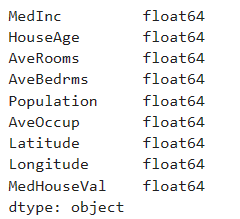
 - 1.1.3: answer is: 0

 - 1.1.4 the row index typically represent instances in the dataset. And each row corresponds to a specific geographic area or block group in California.:

### 1.2: Answer some basic questions
 - 1.2.1: What is the average population per block group? What was California's total population in 1990 according to the Census?  
 - 1.2.2: What are the median house values in California's block groups with the lowest and highest populations? 
 - 1.2.3: Suggest 5 block groups that are likely to be vacation resorts. Do a quick Google search to validate your results.
 - 1.2.4: How many census block groups are west of the city of Berkeley (lat: 37.871666, long: -122.272781)?
 - 1.2.5: What fraction of block groups have an average number of household members greater or equal to 10?

In [7]:
# Your code here
## 1.2.1
average_population = cal_df['Population'].mean()
total_population = cal_df['Population'].sum()
print(f"1.2.1: Answer is: {average_population} and {total_population}")

## 1.2.2
lowestpopulaton = cal_df.loc[cal_df['Population'].idxmin()]['MedHouseVal']
highestpopulaton = cal_df.loc[cal_df['Population'].idxmax()]['MedHouseVal']
print(f"1.2.2: Answer is: {lowestpopulaton} and {highestpopulaton}")

## 1.2.3
pass

## 1.2.4
block_of_west = cal_df[cal_df['Longitude']<-122.272781]
num_of_westernblock = len(block_of_west)
print(f"1.2.4: Answer is: {num_of_westernblock}")

## 1.2.5
high_avgoccup = cal_df[cal_df['AveOccup'] >= 10]
print(f"1.2.5: Answer is:\n {high_avgoccup}")
row_labels_list = high_avgoccup.index.tolist()
print(row_labels_list)
print(len(row_labels_list))

1.2.1: Answer is: 1425.4767441860465 and 29421840.0
1.2.2: Answer is: 3.5 and 1.344
1.2.4: Answer is: 2167
1.2.5: Answer is:
         MedInc  HouseAge   AveRooms  AveBedrms  Population     AveOccup  \
91      0.8668      52.0   2.443182   0.988636       904.0    10.272727   
270     3.8750      33.0   3.021277   0.659574       575.0    12.234043   
1039    4.3029      16.0   6.090592   1.121951      4930.0    17.177700   
1067    3.4191      52.0   4.530612   0.816327      1107.0    11.295918   
1617   11.7064      17.0   9.361702   1.127660      1722.0    12.212766   
2511    4.6250      36.0  24.500000   3.500000        28.0    14.000000   
2723    3.4107      13.0   5.156250   1.125000       822.0    12.843750   
2899    1.9125      35.0   2.926829   0.853659       477.0    11.634146   
3364    5.5179      36.0   5.142857   1.142857      4198.0   599.714286   
4479    3.5769      41.0   4.940000   1.100000       925.0    18.500000   
4861    0.4999      29.0   2.373272   1.055300   

In [8]:
# codes for 1.2.3
# t_df = cal_df
# selected_factors = ['Population','MedHouseVal']
# selected_data = t_df[selected_factors]

# # calculate the score
# t_df['score'] = 0.5*selected_data['Population'] + 0.5*selected_data['MedHouseVal']

# top_5 = t_df.nlargest(5,'score')
# selected_location = t_df.loc[top_5.index]
# print(selected_location)

# coordinate = list(zip(selected_location['Latitude'], selected_location['Longitude']))
# print(coordinate)
t_df = cal_df
selected_factors = ['AveRooms','AveOccup']
selected_data = t_df[selected_factors]

# calculate the score
t_df['score'] = 0.5*selected_data['AveRooms'] - 0.5*selected_data['AveOccup']

top_5 = t_df.nlargest(10,'score')
selected_location = t_df.loc[top_5.index]
print(selected_location)

coordinate = list(zip(selected_location['Latitude'], selected_location['Longitude']))
print(coordinate)

       MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  \
1914   1.8750      33.0  141.909091  25.636364        30.0  2.727273   
1979   4.6250      34.0  132.533333  34.066667        36.0  2.400000   
12447  1.6154      17.0   62.422222  14.111111        83.0  1.844444   
1913   4.0714      19.0   61.812500  11.000000       112.0  2.333333   
11862  2.6250      25.0   59.875000  15.312500        28.0  1.750000   
1912   4.9750      16.0   56.269231  10.153846        54.0  2.076923   
9676   3.2431      14.0   52.848214  11.410714       265.0  2.366071   
11707  1.1912      22.0   52.690476   8.857143        98.0  2.333333   
2395   3.8750      23.0   50.837838  10.270270        64.0  1.729730   
1240   3.1250      11.0   47.515152  11.181818        82.0  2.484848   

       Latitude  Longitude  MedHouseVal      score  
1914      38.91    -120.10      5.00001  69.590909  
1979      38.80    -120.08      1.62500  65.066667  
12447     33.97    -114.49      0.87500  30.2888

*Provide your answers below:*

 - 1.2.1: 1425.4767441860465 and 29421840.0
 - 1.2.2: 3.5 and 1.344
 <!-- - 1.2.3: I made my suggestion mainly based on the population and MedHouseVal. So, I made a simple linear evaluation model. Suppose the score $y = 0.5*population+0.5*MedHouseVal$ and choose the top 5 scorer. The outcome is:
   (33.35,-117.42) Fallbrook Union Elementary School District, California. And there're lots of goverment institute and Supply Point in the surrounding.
   (36.64,-121.79) The neighborhood near the California State University, Monterey Bay
   (38.43,-121.44) It seems to be a community in Laguna, Sacramento.
   (33.89,-117.74) It's near the Chino Hills State Park.
   (34.03,-117.78) Phillips Ranch -->
 - 1.2.3 I made my suggestion mainly based on the AveRooms and AveOccup. So, I made a simple linear evaluation model. Suppose the score $y = 0.5*population-0.5*AveOccup$ and choose the top 5 scorer. The outcome is:(top 10) in case of the adjacent area

(38.91, -120.1), (38.8, -120.08), (33.97, -114.49), (39.01, -120.06), (40.27, -121.25), (39.01, -120.16), (37.64, -119.02), (39.15, -120.06), (37.12, -119.34), (38.42, -120.19)  

(38.91, -120.1), Lake Tahoe Unified School District, CA. Near the Fallen Leaf Lake  
(38.8, -120.08), Sierra-at-Tahoe Resort  
(33.97, -114.49), In the colorado river reservation  
(39.01, -120.06), Lake Tahoe  
(40.27, -121.25), Near Lake Almanor  
(37.64, -119.02), Mammoth Mountain Ski Area
 - 1.2.4: 2167
 - 1.2.5: [91, 270, 1039, 1067, 1617, 2511, 2723, 2899, 3364, 4479, 4861, 5985, 5986, 7164, 8874, 9172, 12104, 12443, 13034, 13366, 14756, 14804, 15790, 16171, 16420, 16528, 16594, 16643, 16669, 16672, 17891, 18520, 19006, 19435, 19524, 20121, 20352]
37

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [9]:
# enter your code here
summary_table = cal_df.describe().transpose()

# # Selecting the required columns
summary_table = summary_table[['count', 'mean', 'std', 'min', '50%', 'max']]
summary_table.reset_index(inplace=True)
# summary_table['name'] = summary_table.index
summary_table.columns = ['name','count', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
# summary_table.reset_index(drop=True, inplace=True)
# Displaying the final table
print(summary_table)

          name    count         Mean  Standard Deviation     Minimum  \
0       MedInc  20640.0     3.870671            1.899822    0.499900   
1     HouseAge  20640.0    28.639486           12.585558    1.000000   
2     AveRooms  20640.0     5.429000            2.474173    0.846154   
3    AveBedrms  20640.0     1.096675            0.473911    0.333333   
4   Population  20640.0  1425.476744         1132.462122    3.000000   
5     AveOccup  20640.0     3.070655           10.386050    0.692308   
6     Latitude  20640.0    35.631861            2.135952   32.540000   
7    Longitude  20640.0  -119.569704            2.003532 -124.350000   
8  MedHouseVal  20640.0     2.068558            1.153956    0.149990   
9        score  20640.0     1.179172            5.344178 -620.083333   

        Median       Maximum  
0     3.534800     15.000100  
1    29.000000     52.000000  
2     5.229129    141.909091  
3     1.048780     34.066667  
4  1166.000000  35682.000000  
5     2.818116   1243

### 1.4 Simple Linear Regression

Estimate a linear regression of the median house value (the dependent variable) on the population (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Based on this analysis, can you conclude anything about the causal effect of decreasing the population on the median housing value?

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           0.000398
Time:                        23:32:36   Log-Likelihood:                -32236.
No. Observations:               20640   AIC:                         6.448e+04
Df Residuals:                   20638   BIC:                         6.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1044      0.013    163.012      0.0

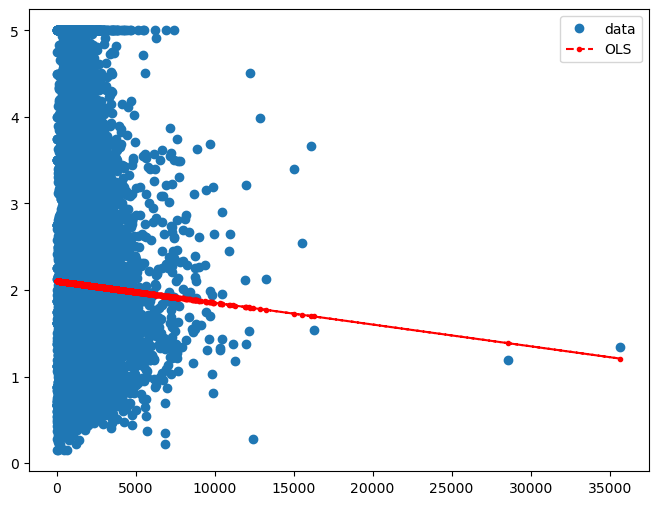

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
x = cal_df['Population']
X = sm.add_constant(x)
y = cal_df['MedHouseVal']
# print(X)
# Ordinary Least Squares
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

y_fitted = model.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')


*Write your response here.*  
From the summary form above, it's obvious that there is strong multicollinearity. The regression coefficient is 2.1044. The standard error is 0.013, showcasing the relatively concentrated distribution.  
So, I can't conclude anything of the effect of the decreasing population on the median housing value since the multicollinearity can lead to the unstability of estimated value and the Expanding the confidence interval for parameter prediction.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $5,000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green
5. Add an appropriate title

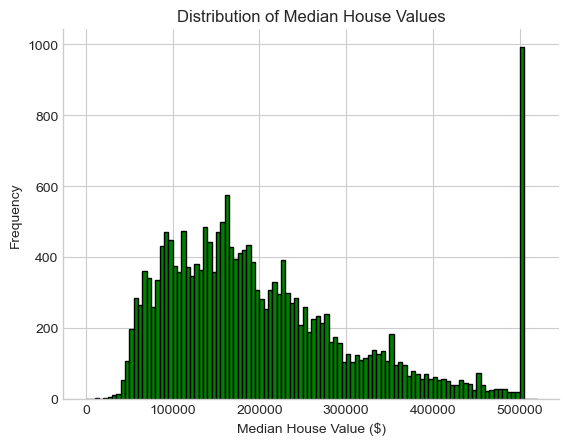

In [11]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']
# edit the code below to make the graph look good
# plt.hist(cal_df['MedHouseVal'])
plt.style.use('seaborn-v0_8-whitegrid')
temp_df = cal_df
# # plt.hist(temp_df['MedHouseVal'])
temp_df['MedHouseVal'] = temp_df['MedHouseVal']*100000

bin_width = 5000
bins = np.arange(0, 520000 + bin_width, bin_width)  # Adjust bin width
plt.hist(cal_df['MedHouseVal'], bins=bins, color='green', edgecolor='black')

plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### 2.2: Histogram of average occupancy

Now use your histograming skills to create a fine looking histogram of the average number of household members ("AveOccup"). In the same figure, plot the mean and median values of this variable. (Hint: applying a very common transformation to the data might make things easier).


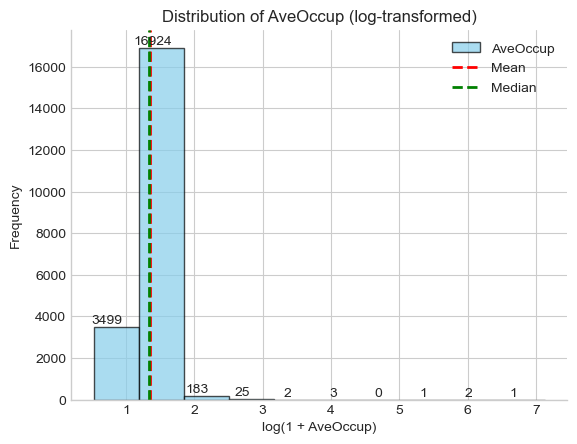

In [12]:
# enter your code here
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
plt.style.use('seaborn-v0_8-whitegrid')
log_ave_occup = np.log1p(cal_df['AveOccup'])

n, bins, patches = plt.hist(log_ave_occup, bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='AveOccup')

plt.axvline(log_ave_occup.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(log_ave_occup), color='green', linestyle='dashed', linewidth=2, label='Median')

for bin_value, frequency in zip(bins, n):
    plt.text(bin_value + 0.2, frequency, f'{int(frequency)}', ha='center', va='bottom')

plt.title('Distribution of AveOccup (log-transformed)')
plt.xlabel('log(1 + AveOccup)')
plt.ylabel('Frequency')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.show()

### 2.3: Scatter plot of housing prices and population
Use matplotlib to create a scatter plot that shows the relationship between the block group median house value (y-axis) and the block group population (x-axis). Properly label your axes, and make sure that your graphic looks polished and professional.

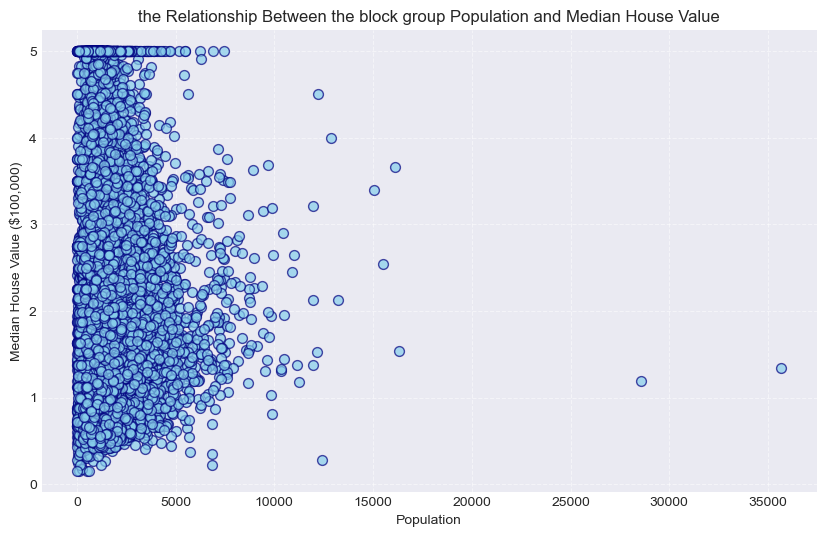

In [13]:
# enter your code here
import matplotlib.pyplot as plt

# Prepare IPython to work with matplotlib
%matplotlib inline
cal_df['MedHouseVal'] = cal_data['target']

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6)) 

plt.scatter(cal_df['Population'], cal_df['MedHouseVal'], alpha=0.7, color='skyblue', edgecolor='navy', s=50)

plt.title('the Relationship Between the block group Population and Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value ($100,000)')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


### 2.4: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between media house value and population in California? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position and compare to your answer in section 1.4.

In [14]:
# enter your code here
correlation = cal_df['Population'].corr(cal_df['MedHouseVal'])
print('Correlation:', correlation)

Correlation: -0.024649678888894896


*Write your thoughts here (1-2 paragraphs).*  

It seems that there isn't a relationship between media house value and population in California. And the correlation is -0.025. I think if there is a relationship, it's just a correlation. Because causality requires one thing to be the direct consequence of the other thing. But in fact, there're lots of factors that contribute to the media house value like the weather, AveInc etc.

### 2.5 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated? Explain these results.

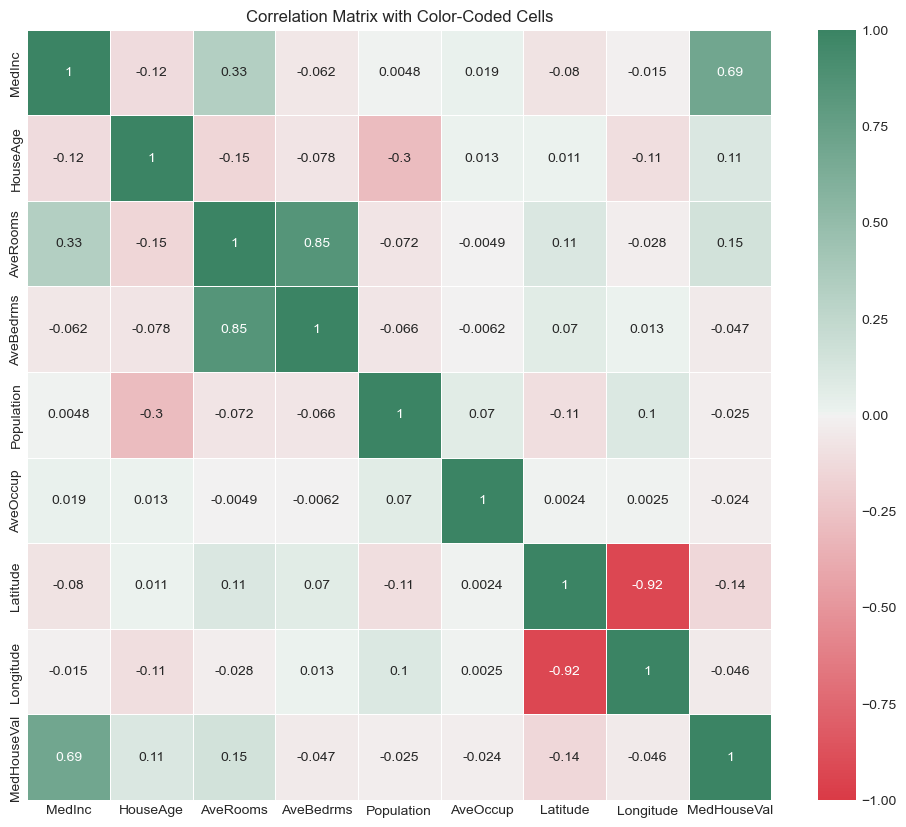

In [15]:
# enter your code here
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = cal_df.corr()
plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=.5)

plt.title('Correlation Matrix with Color-Coded Cells')
plt.show()

*Write your response here.*
- The most positively correlated variables are AveRooms and AveBedrms. It's common that the house which owns more rooms has more bedrooms because it can accommodate more residents. 
- The most negatively correlated variables are Longitude and Latitude. It's obvious that they are independent variables and not related with each other. And the 2D point is the coordinate in the map composed of orthogonal latitude and accuracy.

### 2.6 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Text(0.5, 1.0, 'the map')

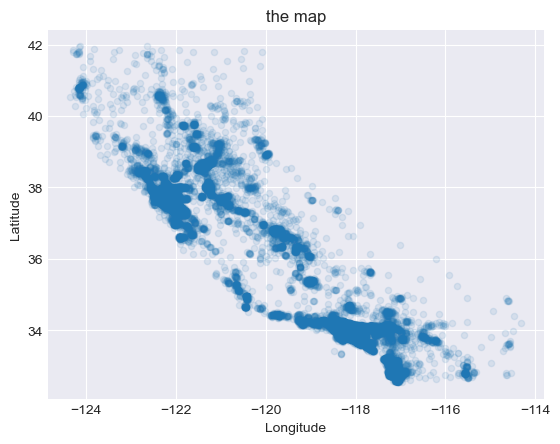

In [16]:
cal_df.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.1)
plt.title("the map")

This can show which areas have high housing density

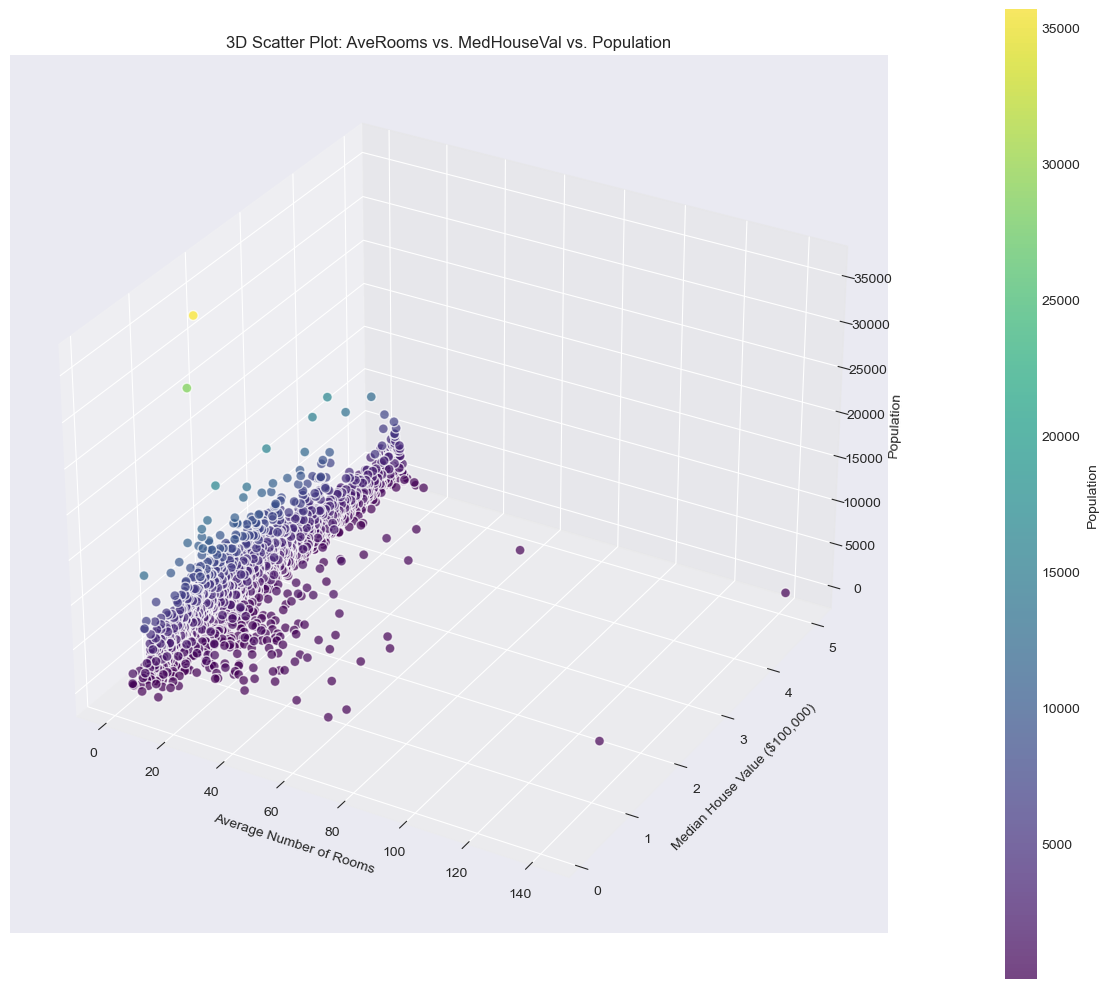

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = cal_df['AveRooms']
y = cal_df['MedHouseVal']
z = cal_df['Population'] 

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', alpha=0.7, edgecolors='w', s=50)

ax.set_xlabel('Average Number of Rooms')
ax.set_ylabel('Median House Value ($100,000)')
ax.set_zlabel('Population')
ax.set_title('3D Scatter Plot: AveRooms vs. MedHouseVal vs. Population')

color_bar = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=30)
color_bar.set_label('Population')

fig.tight_layout()
plt.show()


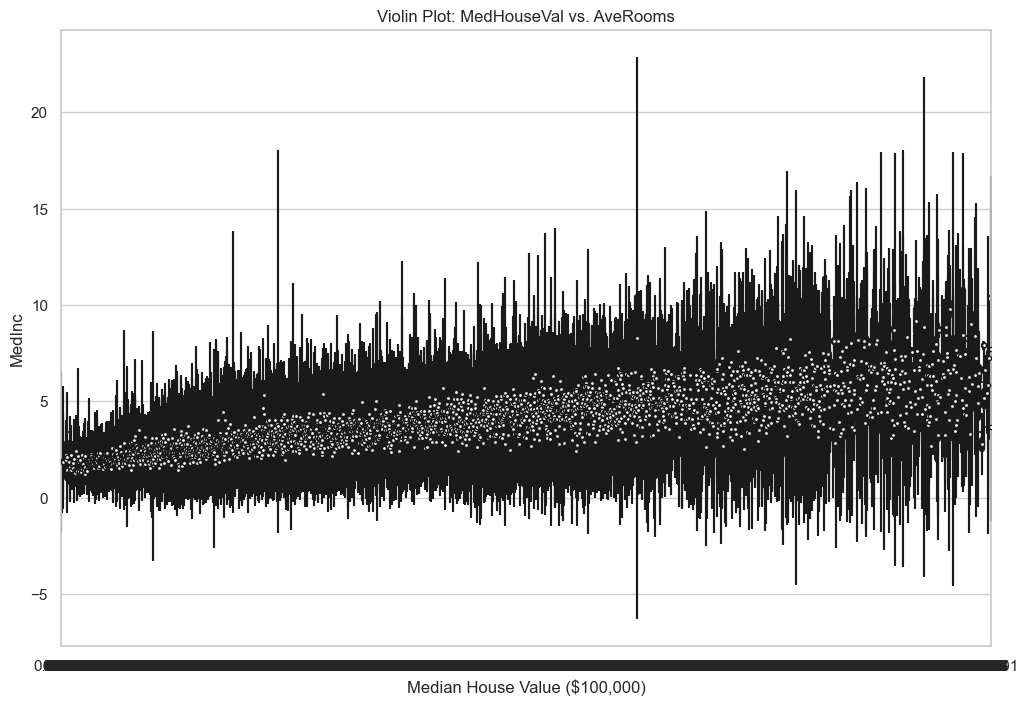

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x=cal_df['MedHouseVal'], y=cal_df['MedInc'], palette="viridis")

plt.xlabel('Median House Value ($100,000)')
plt.ylabel('MedInc')
plt.title('Violin Plot: MedHouseVal vs. AveRooms')

plt.show()
